In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/cardekho_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [ ]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
df.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
car_name,0
brand,0
model,0
vehicle_age,0
km_driven,0
seller_type,0
fuel_type,0
transmission_type,0
mileage,0


In [ ]:
df.shape

(15411, 14)

<a href="https://colab.research.google.com/github/Utkarsh-Rane43/FODS-PROJECT/blob/main/FODS_PART2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
sns.set_style('darkgrid')

Distribution of Selling Price :


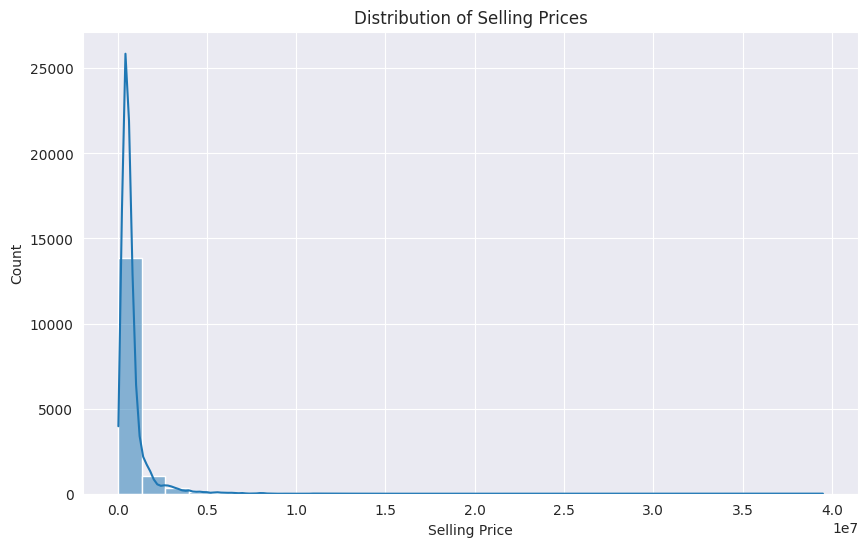

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True, bins=30)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.show()


The distribution shows a right-skewed pattern, indicating that most cars are sold at lower prices, with fewer cars at higher price points.


Top 10 Brands by Average Selling Price:

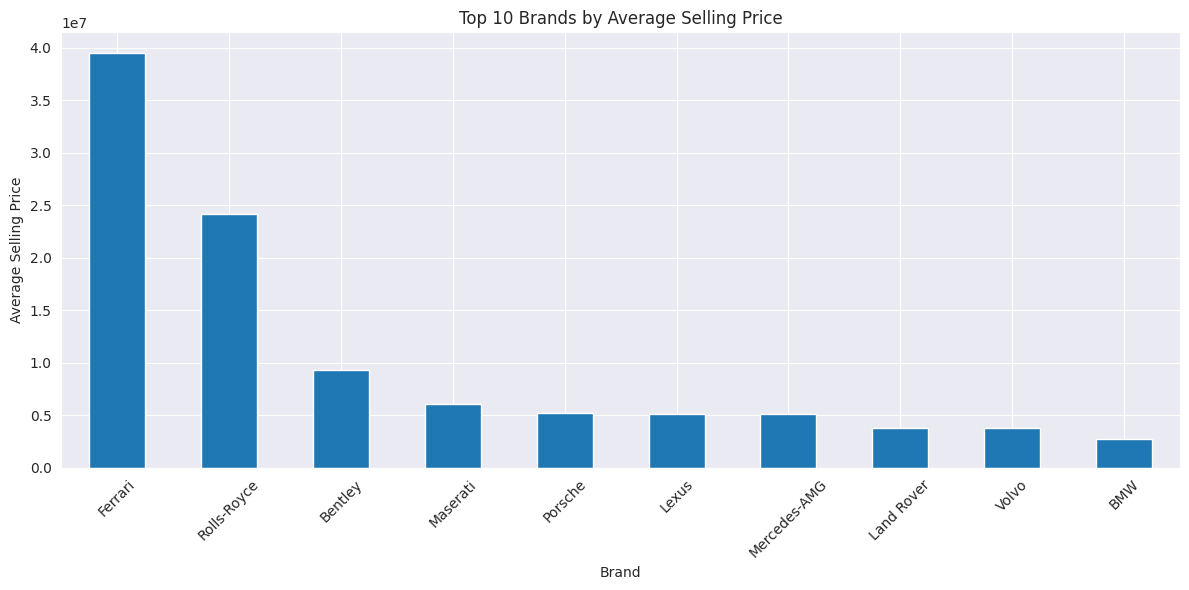

In [ ]:
top_brands = df.groupby('brand')['selling_price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_brands.plot(kind='bar')
plt.title('Top 10 Brands by Average Selling Price')
plt.xlabel('Brand')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Certain brands command higher average selling prices, suggesting a premium perception or higher value retention for these brands.

Relationship between Vehicle Age and Selling Price:

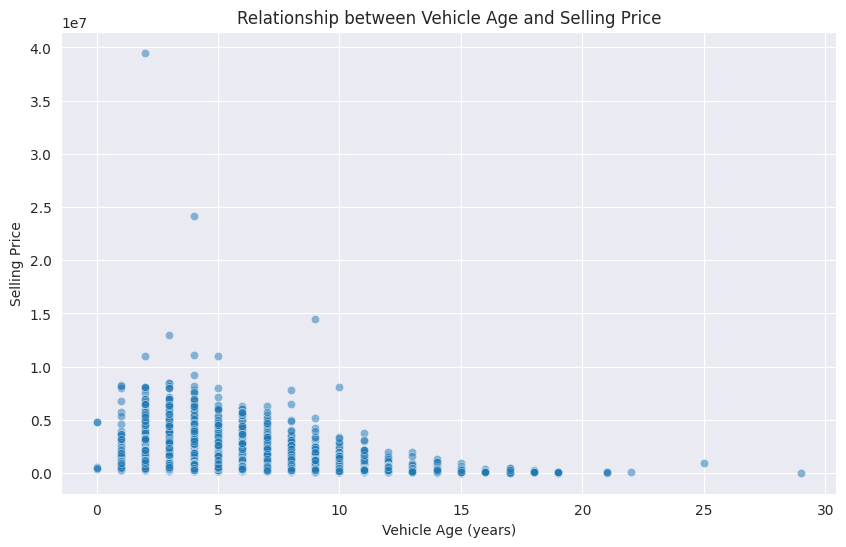

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vehicle_age', y='selling_price', data=df, alpha=0.5)
plt.title('Relationship between Vehicle Age and Selling Price')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Selling Price')
plt.show()

There is a negative correlation between vehicle age and selling price, as expected, with older vehicles generally selling for less.

Average Selling Price by Fuel Type:

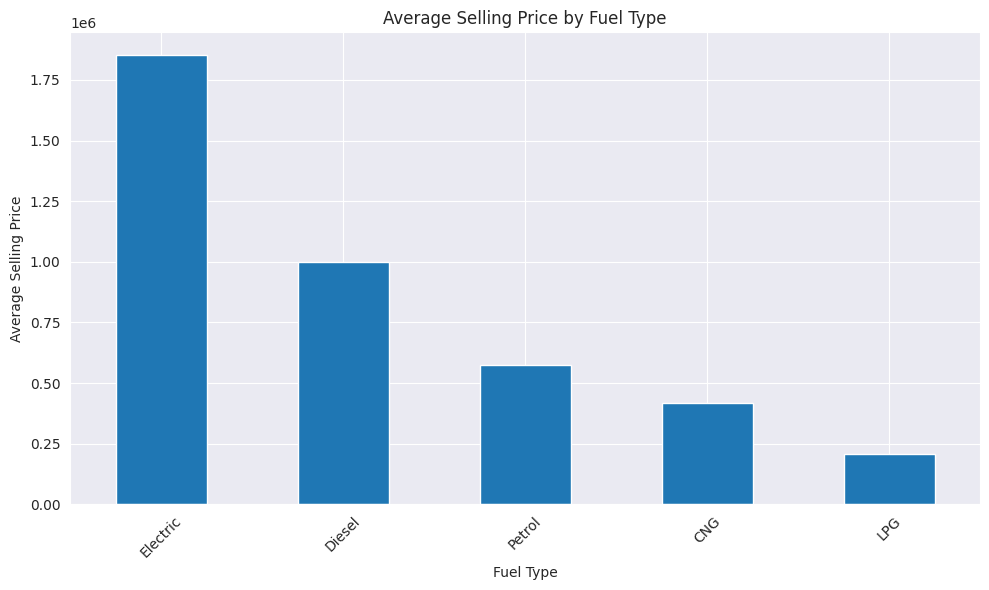

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby('fuel_type')['selling_price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Diesel and petrol vehicles have different average selling prices, which could be due to differences in fuel efficiency, maintenance costs, or market demand.

Correlation Heatmap of Numeric Features:

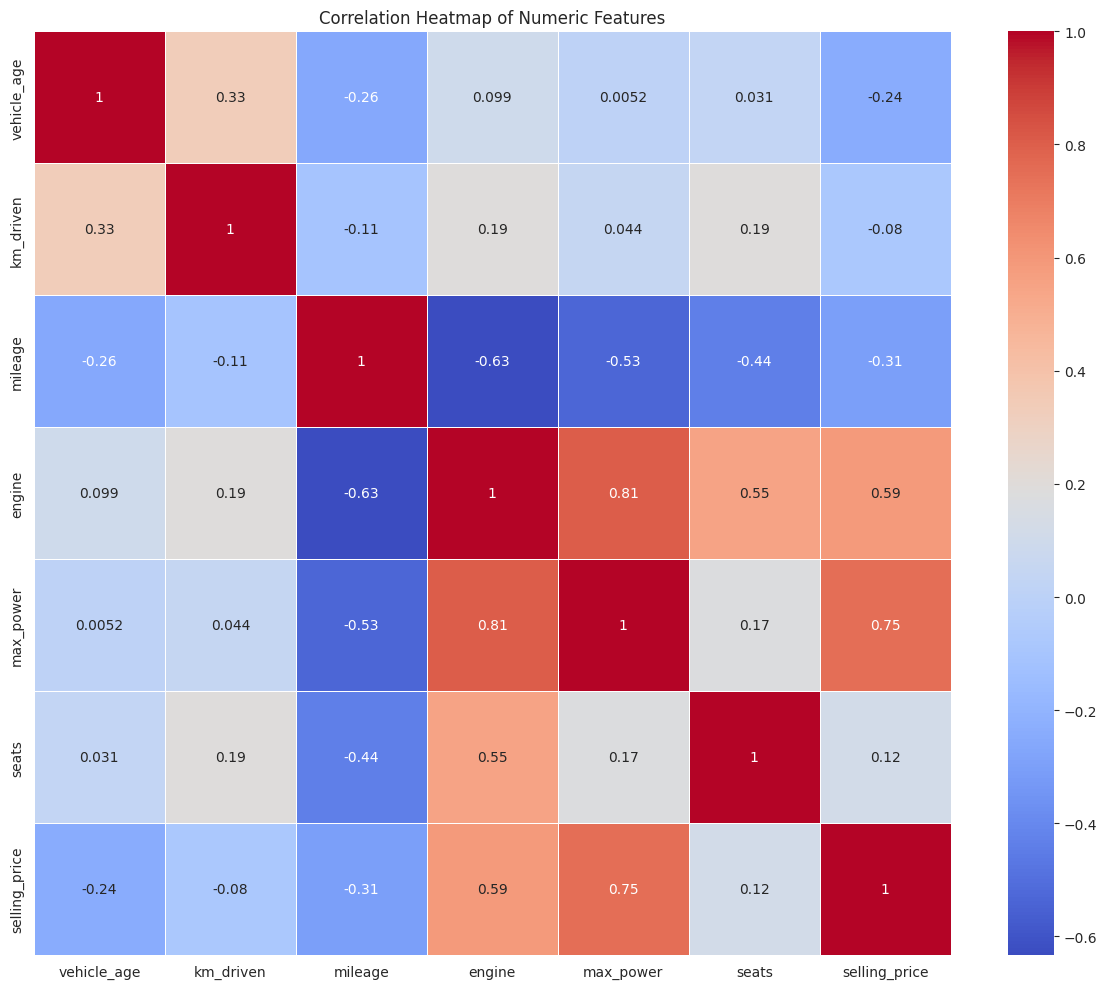

In [ ]:
numeric_columns = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

The heatmap reveals correlations between features, such as a strong negative correlation between vehicle age and selling price, and a positive correlation between engine size and selling price.

Kilometers Driven vs Selling Price:

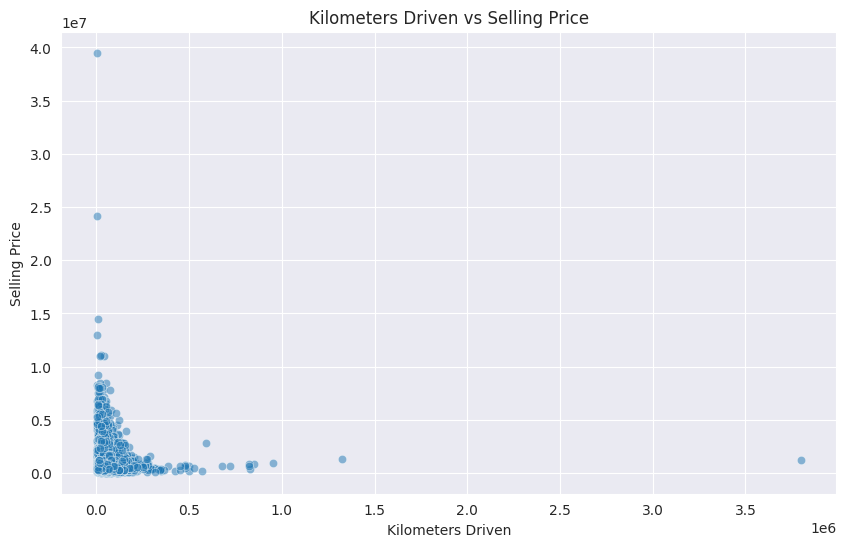

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=df, alpha=0.5)
plt.title('Kilometers Driven vs Selling Price')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

1. There's a general negative correlation between kilometers driven and selling price.
2. Cars with lower mileage tend to have higher selling prices.
3. The relationship isn't strictly linear; there's a concentration of data points at lower kilometer ranges with varying prices.
4. Some high-mileage vehicles still command relatively high prices, possibly due to other factors like brand or condition.


Engine Size vs Selling Price :

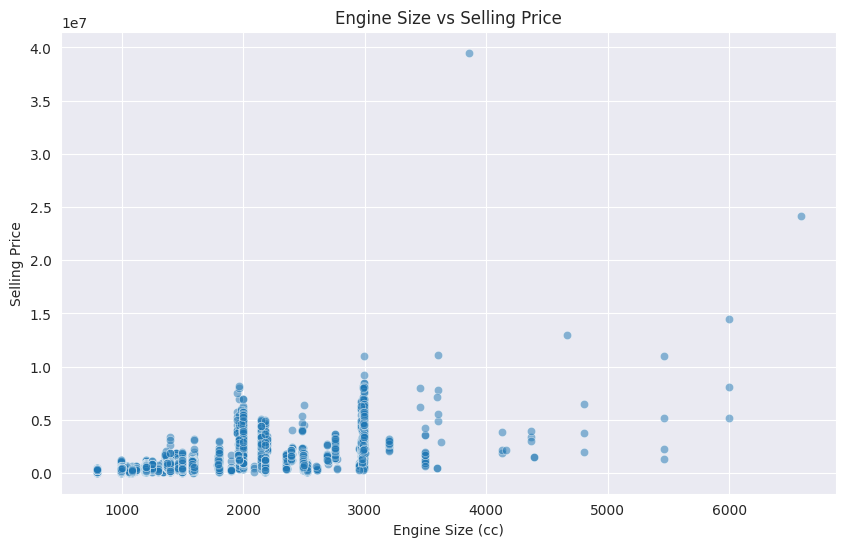

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine', y='selling_price', data=df, alpha=0.5)
plt.title('Engine Size vs Selling Price')
plt.xlabel('Engine Size (cc)')
plt.ylabel('Selling Price')
plt.show()

1. There's a positive correlation between engine size and selling price.
2. Larger engines generally command higher prices, which could be due to their association with more powerful or luxury vehicles.
3. The relationship shows some clustering, suggesting different car segments (e.g., economy, mid-range, luxury) based on engine size and price.

Pair Plot of Numeric Features :

<Figure size 2000x2000 with 0 Axes>

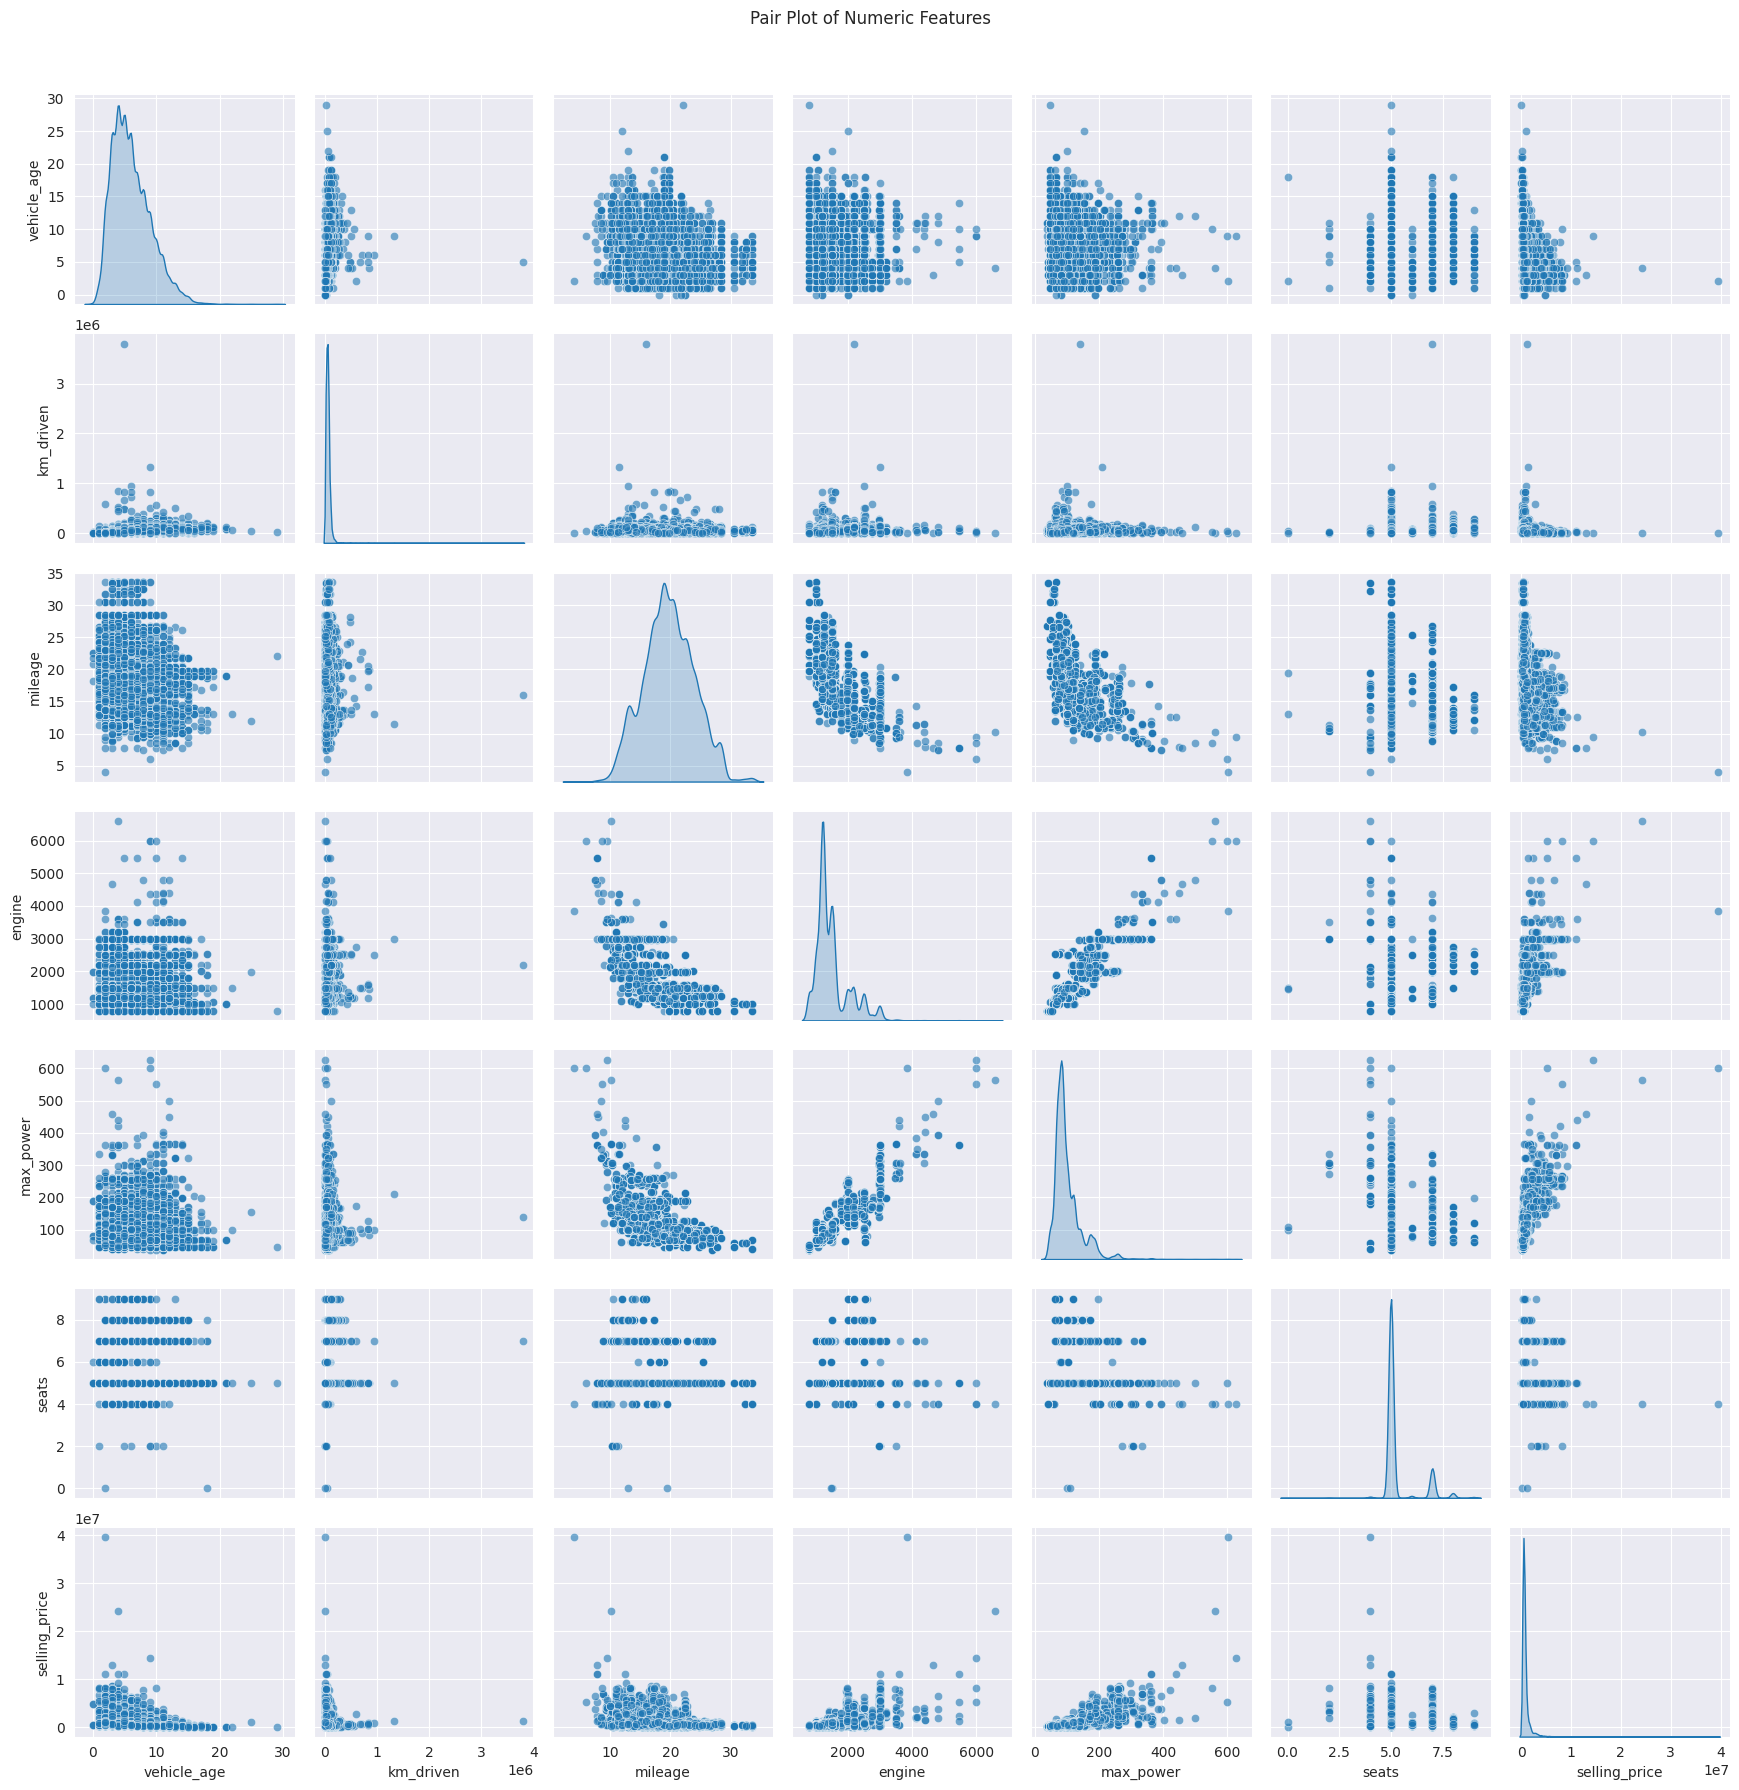

In [ ]:
numeric_columns = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
plt.figure(figsize=(20, 20))
sns.pairplot(df[numeric_columns], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.tight_layout()
plt.show()


1. This plot provides a comprehensive view of relationships between multiple numeric features:
  1. Strong positive correlation between engine size and max power.
  2. Negative correlation between vehicle age and selling price.
  3. Positive correlation between engine size/max power and selling price.
  4. Weak negative correlation between mileage (fuel efficiency) and engine size/max power.
2. The diagonal shows the distribution of each feature, revealing skews in selling price and km_driven.

Selling Price by Transmission Type:

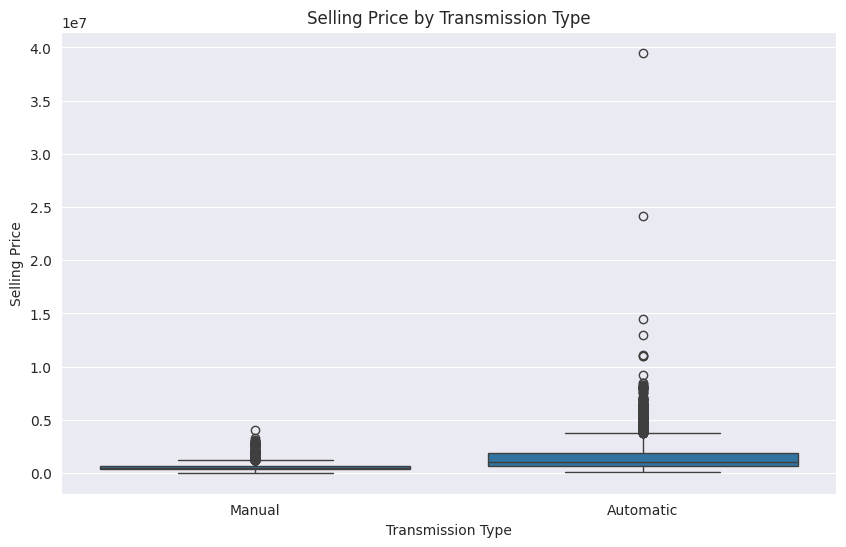

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission_type', y='selling_price', data=df)
plt.title('Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.show()

1. Automatic transmission vehicles generally have higher median selling prices than manual transmission vehicles.
2. The price range for automatic vehicles is wider, suggesting more variability in the automatic transmission market.
3. This could indicate that automatic transmissions are more common in higher-end or luxury vehicles.


Selling Price Distribution by Seller Type:

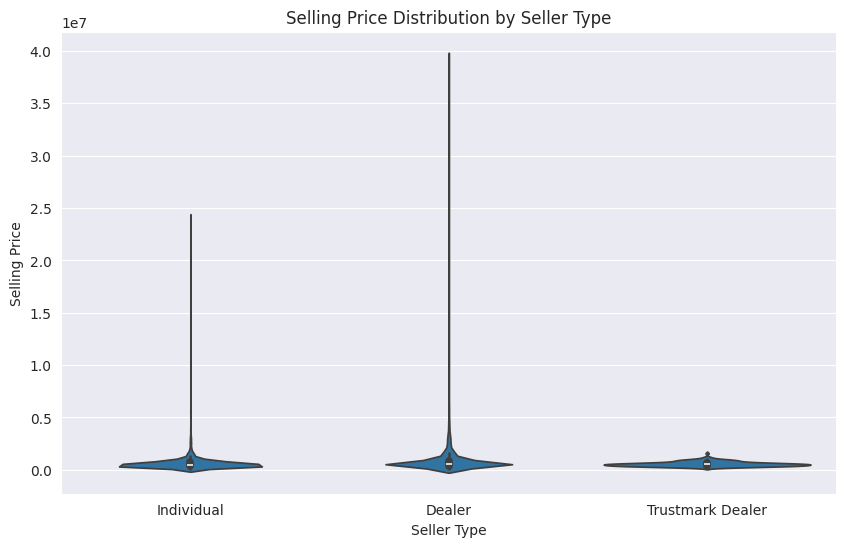

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='seller_type', y='selling_price', data=df)
plt.title('Selling Price Distribution by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.show()


1. There are noticeable differences in price distributions among different seller types.
2. Dealer-sold vehicles seem to have a higher median price and a wider price range compared to individual sellers.
3. Trustmark Dealer vehicles appear to have the highest median price, possibly due to certified pre-owned programs or higher-quality inventory.
4. Individual sellers have a narrower price range, which might indicate they deal more in the mid-to-lower price segments.